# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [55]:
import pandas as pd
from pandas.tseries.offsets import *
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [31]:
apple = pd.read_csv('appl_1980_2014.csv', parse_dates=['Date'])
apple.head()

        Date   Open   High    Low  Close    Volume  Adj Close
0 2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
1 2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2 2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
3 2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
4 2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

### Step 4.  Check out the type of the columns

In [32]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 5. Transform the Date column as a datetime type

### Step 6.  Set the date as the index

In [33]:
apple.index=apple.Date
del apple['Date']
apple.head()

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52

### Step 7.  Is there any duplicate dates?

In [34]:
dates = apple.index.values.tolist()
len(dates)==len(set(dates))

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [35]:
apple.sort_index(ascending=True, inplace=True)
apple.head()

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41

### Step 9. Get the last business day of each month

In [50]:
offset = BMonthEnd()
s = set()
for e in dates:
     s.add(offset.rollforward(e))

33

### Step 10.  What is the difference in days between the first day and the oldest

In [48]:
apple.index.max()-apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [51]:
len(s)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

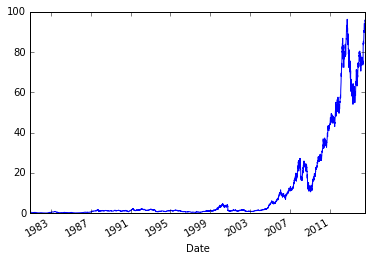

In [69]:
apple['Adj Close'].plot()

### BONUS: Create your own question and answer it.

#### Plot the distribution of daily returns

In [70]:
apple['pct_change'] = apple['Adj Close'].pct_change(periods=1)
apple['pct_change'].head()

Date
1980-12-12         NaN
1980-12-15   -0.066667
1980-12-16   -0.071429
1980-12-17    0.025641
1980-12-18    0.025000
Name: pct_change, dtype: float64

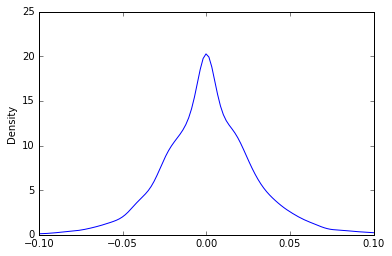

In [74]:
apple['pct_change'][1:].plot(kind='kde',xlim=(-.1,.1))